<a href="https://colab.research.google.com/github/ayutechhunt/ayutechhunt/blob/main/Servo_Prediction_using_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Servo Prediction Using Linear Regression**

---





# Get understand about the data


**What is servo:** In control engineeering a servomechanism , usually shortened to servo,is an automatic device that users error-sensing negative
feedback to correct the action of a mechanism. On displacement-cotrolled applications,it usuallly includes a built-in encoder or other position feedback mechanism

# Import Libraries

In [2]:
import pandas as pd
import numpy as np

#Import Dataset

In [3]:
ds = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/refs/heads/main/Servo%20Mechanism.csv')

# **Get First Five rows of Data set**

In [10]:
ds.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


# **Get Information of the Dataset**

In [11]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


# **Get Sumary Statistics**

In [12]:
ds.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


# **Get Columns Names**

In [9]:
ds.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

# **Get Shape Of Dataframe**

In [13]:
ds.shape

(167, 5)

# **Get catogories and their count**

In [16]:
ds[['Motor']].value_counts()

,count
Motor,
C,40
A,36
B,36
E,33
D,22


In [17]:
ds[['Screw']].value_counts()

,count
Screw,
A,42
B,35
C,31
D,30
E,29


# **Get encoding of Catagorical Features**

In [18]:
ds.replace({'Motor':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

<ipython-input-18-24fa6499d1d2>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ds.replace({'Motor':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)


In [20]:
ds.replace({'Screw':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

<ipython-input-20-c106b5e7a14e>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ds.replace({'Screw':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)


# **Define Y(dependent) and X(independent)**

In [22]:
y=ds['Class']

In [23]:
X=ds[['Motor', 'Screw', 'Pgain', 'Vgain']]

In [24]:
y.shape,X.shape

((167,), (167, 4))

In [25]:
X=ds.drop('Class',axis=1)

In [27]:
X.shape

(167, 4)

In [28]:
X

,Motor,Screw,Pgain,Vgain
0,4,4,5,4
1,1,3,6,5
2,3,3,4,3
3,1,0,3,2
4,3,1,6,5
...,...,...,...,...
162,1,2,3,2
163,1,4,3,1
164,2,3,4,3
165,0,1,3,2


# **Get train Spilit Model**

In [29]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2529)

In [32]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((116, 4), (51, 4), (116,), (51,))

# **Get Model Train**

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lr = LinearRegression()

In [35]:
lr.fit(X_train,y_train)

LinearRegression()

# **Get odel Prediction**


In [36]:
y_pred = lr.predict(X_test)

In [38]:
y_pred.shape

(51,)

In [39]:
y_pred


array([24.55945258, 30.98765106, 18.54485477, 25.51524243, 38.56082023,
       23.52007775, 11.61947065, 20.03335614, 40.60404401, 41.7009556 ,
       13.66269443, 26.01242807, 16.50163099, 16.54663453, 21.92598051,
       22.52570646, -5.46449561, 30.68912392, 32.7323477 ,  1.41282941,
       33.97718702, 31.63543611, 33.52806048, 30.04133887, 19.38557109,
        6.49364826, 28.5528375 , 17.04382017, 25.06611589,  3.50411229,
       30.59606128, 23.67067716, 35.72188367, 32.08456265, 12.46018697,
        3.6547117 , 23.47201865, 33.03087484, 17.49294672, 37.61450804,
       27.54898855, 22.07657992, 11.51387478,  9.470651  , 30.53852451,
       28.64590014, 33.67865989,  4.60102388, 24.1198037 , 21.13026773,
       25.71390094])

# **Get Model Evaluation**

In [40]:
from sklearn.metrics import mean_absolute_percentage_error

In [41]:
mean_absolute_percentage_error(y_test,y_pred)

0.8268204638174629

# **Get Visualization of actual and predicted values**

In [45]:
import matplotlib.pyplot as mat

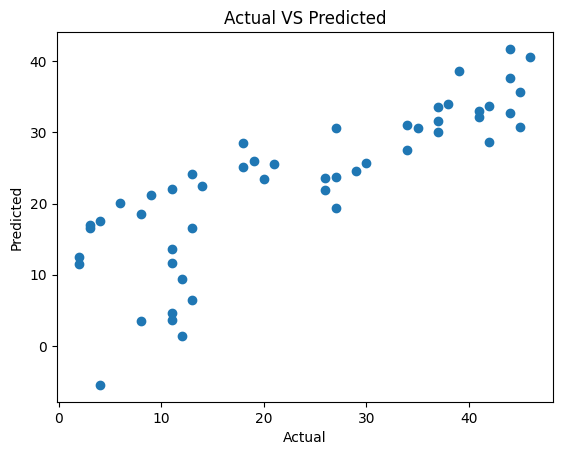

In [47]:
mat.scatter(y_test,y_pred)
mat.xlabel("Actual")
mat.ylabel("Predicted")
mat.title("Actual VS Predicted")
mat.show()

# **Get Future Prediction**

**Lets select a random sample from existing dataset as a new value**

Steps to follow

1.   Extract a sample row using sample function
2.   Seperate X and y
3.   Standardize X
4.   Prediction





In [53]:
X_new = ds.sample(1)

In [54]:
X_new

,Motor,Screw,Pgain,Vgain,Class
58,4,0,3,2,50


In [55]:
X_new.shape

(1, 5)

In [56]:
X_new = X_new.drop('Class',axis=1)

In [57]:
X_new

,Motor,Screw,Pgain,Vgain
58,4,0,3,2


In [58]:
y_new_pred = lr.predict(X_new)

In [60]:
y_new_pred

array([36.51759645])



---



---



---

